In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("listingsAndReviews.csv")
data.head()

,accommodates,country,area,city,availability_365,bathrooms,bedrooms,cancellation_policy,cleaning_fee,extra_people,guests_included,minimum_nights,price,rating,room_type,coordinates,review_date,host_name,number_of_reviews
0,6,Turkey,Kadikoy,Istanbul,362,1.0,2.0,flexible,211.0,211,1,2,527,100.0,Entire home/apt,"[29.03133,40.98585]",2016-04-02T04:00:00.000Z,Zeynep,1
1,3,Turkey,Fatih,Istanbul,365,1.0,1.0,moderate,NaN,0,1,1,121,92.0,Private room,"[28.98009,41.0062]",2017-05-04T04:00:00.000Z,Mehmet Emin,29
2,1,United States,Bushwick,New York,0,1.5,1.0,flexible,NaN,0,1,14,40,100.0,Private room,"[-73.93615,40.69791]",2016-01-31T05:00:00.000Z,Josh,1
3,8,Brazil,Catete,Rio De Janeiro,296,4.0,1.0,strict_14_with_grace_period,0.0,40,4,2,250,80.0,Private room,"[-43.18015675229857,-22.92638234778768]",2016-02-10T05:00:00.000Z,Beatriz,1
4,2,United States,Upper West Side,New York,93,1.0,1.0,strict_14_with_grace_period,135.0,0,1,12,135,94.0,Private room,"[-73.96523,40.79962]",2013-04-29T04:00:00.000Z,Greta,70


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accommodates         5555 non-null   int64  
 1   country              5555 non-null   object 
 2   area                 5555 non-null   object 
 3   city                 5549 non-null   object 
 4   availability_365     5555 non-null   int64  
 5   bathrooms            5545 non-null   float64
 6   bedrooms             5550 non-null   float64
 7   cancellation_policy  5555 non-null   object 
 8   cleaning_fee         4024 non-null   float64
 9   extra_people         5555 non-null   int64  
 10  guests_included      5555 non-null   int64  
 11  minimum_nights       5555 non-null   int64  
 12  price                5555 non-null   int64  
 13  rating               4081 non-null   float64
 14  room_type            5555 non-null   object 
 15  coordinates          5555 non-null   o

In [5]:
data.shape

(5555, 19)

In [6]:
data.describe()

,accommodates,availability_365,bathrooms,bedrooms,cleaning_fee,extra_people,guests_included,minimum_nights,price,rating,number_of_reviews
count,5555.000000,5555.000000,5545.000000,5550.000000,4024.000000,5555.000000,5555.000000,5555.000000,5555.000000,4081.000000,5555.000000
mean,3.505851,173.105671,1.291163,1.411712,94.074801,22.791899,1.747435,5.564356,278.766157,93.099240,27.606481
std,2.297019,139.841893,0.702265,1.041942,110.203782,69.331511,1.487352,22.613861,842.215531,9.023483,49.798376
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,20.000000,0.000000
25%,2.000000,17.000000,1.000000,1.000000,23.000000,0.000000,1.000000,1.000000,70.000000,90.000000,1.000000
50%,3.000000,171.000000,1.000000,1.000000,60.000000,0.000000,1.000000,2.000000,129.000000,95.000000,5.000000
75%,4.000000,317.000000,1.000000,2.000000,129.000000,20.000000,2.000000,3.000000,280.000000,99.000000,32.000000
max,16.000000,365.000000,16.000000,20.000000,2000.000000,2346.000000,16.000000,1250.000000,48842.000000,100.000000,533.000000


In [7]:
print(data['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


In [8]:
print(data['country'].unique())
print(data['city'].unique())
print(data['cancellation_policy'].unique())

['Turkey' 'United States' 'Brazil' 'Canada' 'Hong Kong' 'Australia'
 'Spain' 'Portugal' 'China']
['Istanbul' 'New York' 'Rio De Janeiro' 'Montreal' 'Hong Kong' 'Sydney'
 'Barcelona' 'Porto' 'Oahu' 'The Big Island' 'Maui' 'Kauai' nan
 'Other (Domestic)' 'Other (International)']
['flexible' 'moderate' 'strict_14_with_grace_period' 'super_strict_30'
 'super_strict_60']


In [9]:
data.isnull().sum()

accommodates              0
country                   0
area                      0
city                      6
availability_365          0
bathrooms                10
bedrooms                  5
cancellation_policy       0
cleaning_fee           1531
extra_people              0
guests_included           0
minimum_nights            0
price                     0
rating                 1474
room_type                 0
coordinates               0
review_date            1388
host_name                 0
number_of_reviews         0
dtype: int64

In [10]:
#replacing null values with mean 
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace =True)
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace =True)
data['cleaning_fee'].fillna(data['cleaning_fee'].mean(), inplace =True)
data['rating'].fillna(data['rating'].mean(), inplace =True)

In [11]:
data['review_date'] = pd.DataFrame(pd.DatetimeIndex(data['review_date']).month)
data['review_date']

0        4.0
1        5.0
2        1.0
3        2.0
4        4.0
        ... 
5550    12.0
5551     8.0
5552     4.0
5553     1.0
5554     NaN
Name: review_date, Length: 5555, dtype: float64

In [12]:
#convering the dtype to numeric
data['review_date'] = pd.to_numeric(data['review_date'], errors='coerce')

In [13]:
data['review_date'].unique()

array([ 4.,  5.,  1.,  2., nan, 12.,  9.,  6.,  7.,  8., 10.,  3., 11.])

In [14]:
#dropping null values present in review_date and city column since we cannot fill in randomly as it should be accurate
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

accommodates           0
country                0
area                   0
city                   0
availability_365       0
bathrooms              0
bedrooms               0
cancellation_policy    0
cleaning_fee           0
extra_people           0
guests_included        0
minimum_nights         0
price                  0
rating                 0
room_type              0
coordinates            0
review_date            0
host_name              0
number_of_reviews      0
dtype: int64

In [16]:
data.head()

,accommodates,country,area,city,availability_365,bathrooms,bedrooms,cancellation_policy,cleaning_fee,extra_people,guests_included,minimum_nights,price,rating,room_type,coordinates,review_date,host_name,number_of_reviews
0,6,Turkey,Kadikoy,Istanbul,362,1.0,2.0,flexible,211.000000,211,1,2,527,100.0,Entire home/apt,"[29.03133,40.98585]",4.0,Zeynep,1
1,3,Turkey,Fatih,Istanbul,365,1.0,1.0,moderate,94.074801,0,1,1,121,92.0,Private room,"[28.98009,41.0062]",5.0,Mehmet Emin,29
2,1,United States,Bushwick,New York,0,1.5,1.0,flexible,94.074801,0,1,14,40,100.0,Private room,"[-73.93615,40.69791]",1.0,Josh,1
3,8,Brazil,Catete,Rio De Janeiro,296,4.0,1.0,strict_14_with_grace_period,0.000000,40,4,2,250,80.0,Private room,"[-43.18015675229857,-22.92638234778768]",2.0,Beatriz,1
4,2,United States,Upper West Side,New York,93,1.0,1.0,strict_14_with_grace_period,135.000000,0,1,12,135,94.0,Private room,"[-73.96523,40.79962]",4.0,Greta,70


In [17]:
data.to_csv("airbnb.csv")

Text(0.5, 1.0, 'Total number of rooms booked in each country')

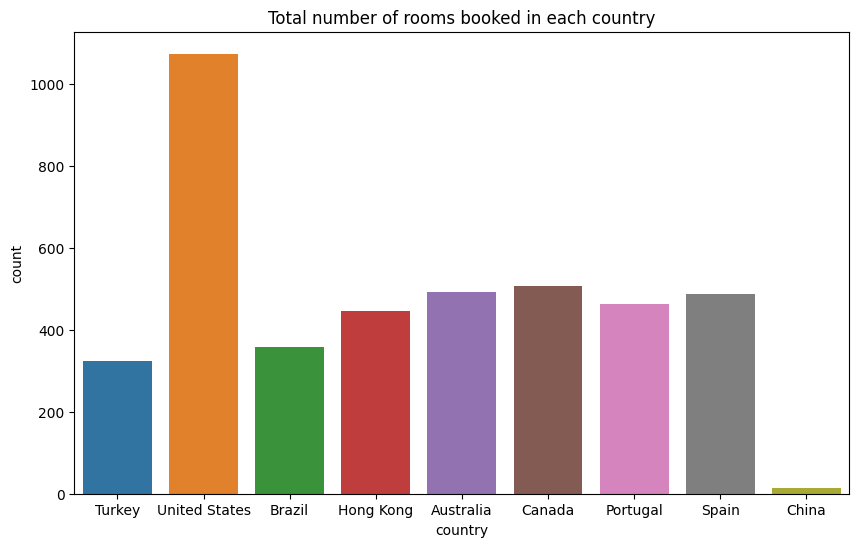

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="country")
plt.title("Total number of rooms booked in each country")

Text(0.5, 1.0, 'Number of rooms booked in each category across countries')

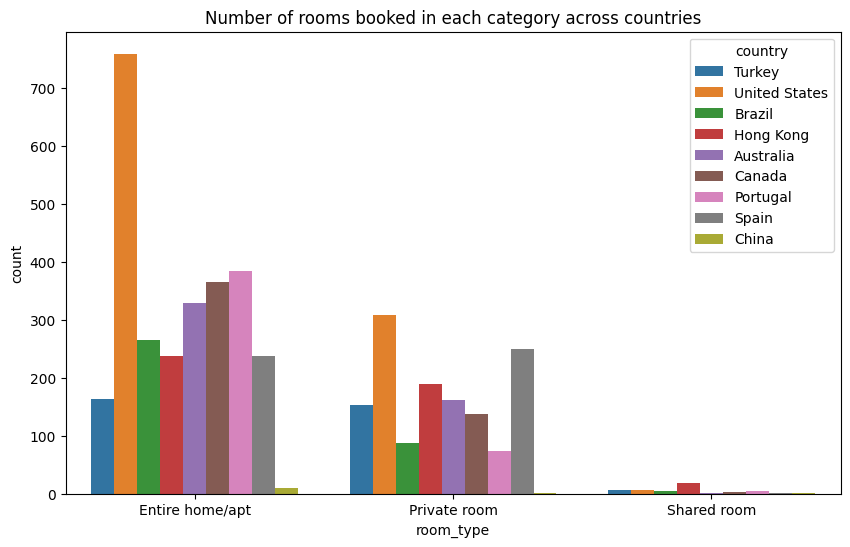

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="room_type", hue="country")
plt.title("Number of rooms booked in each category across countries")

In [20]:
countries = data['country'].unique()

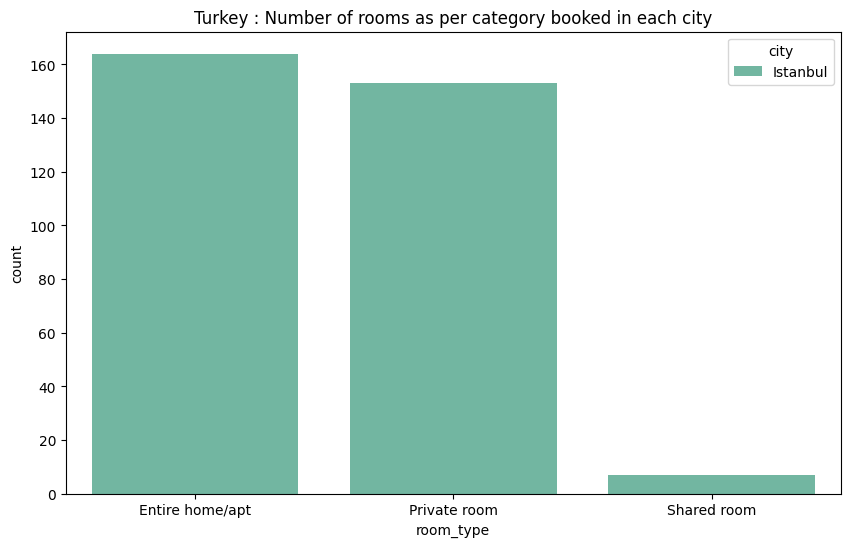

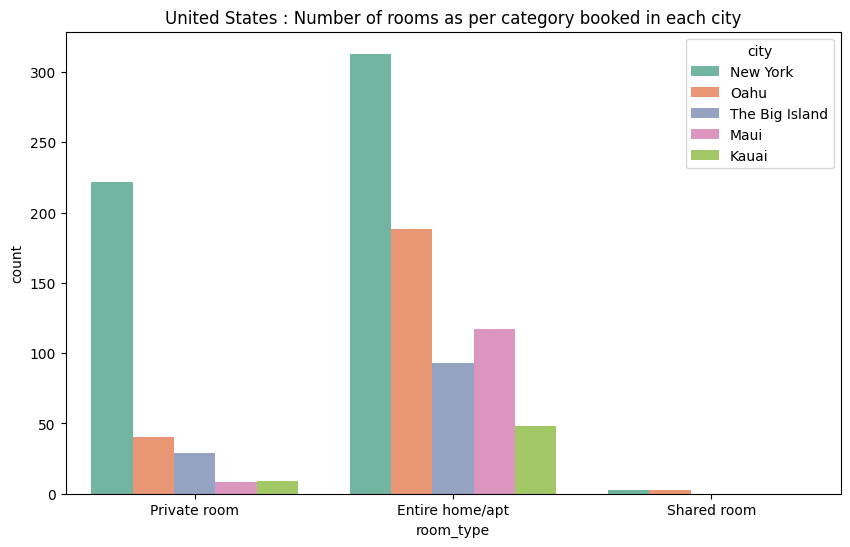

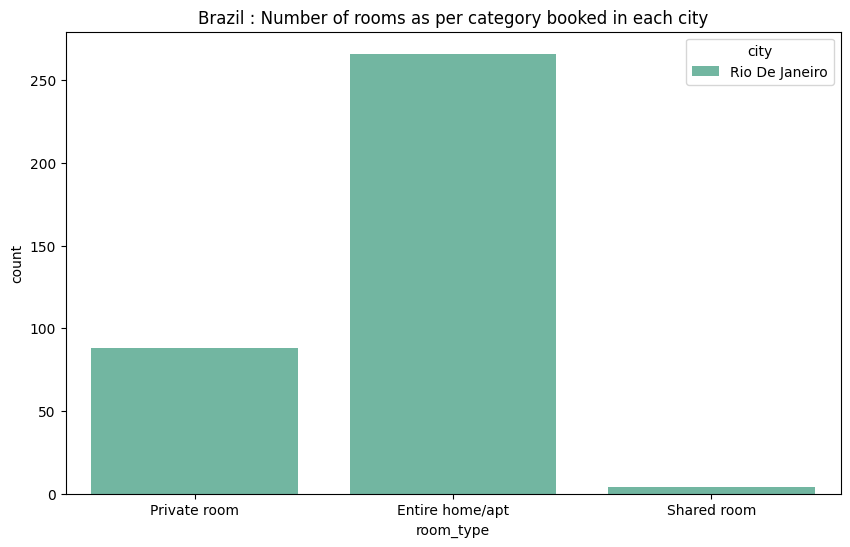

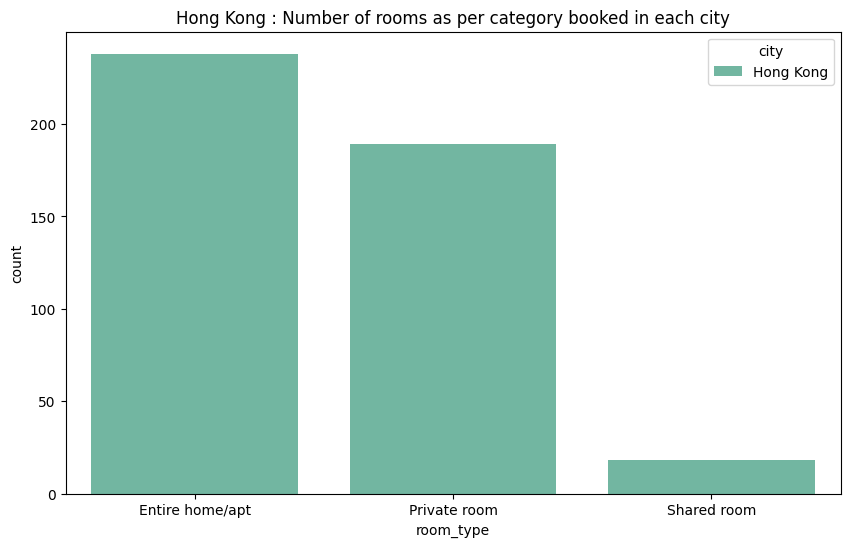

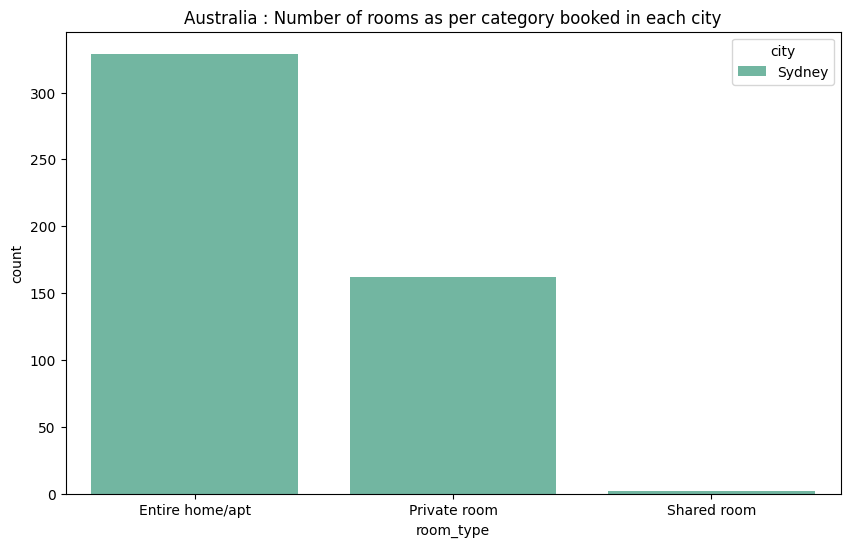

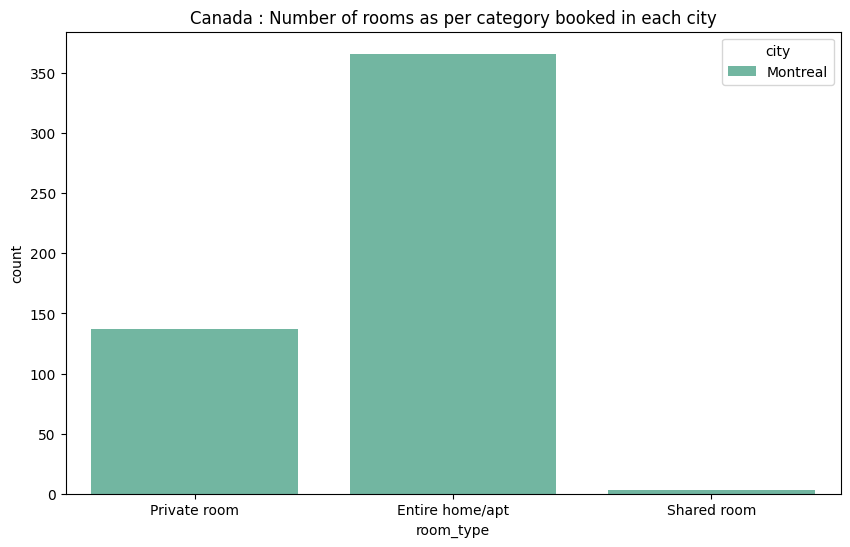

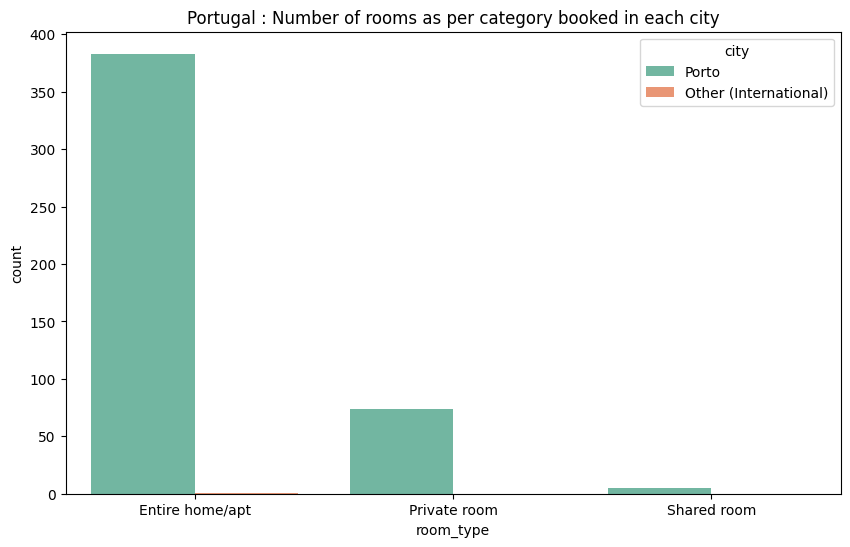

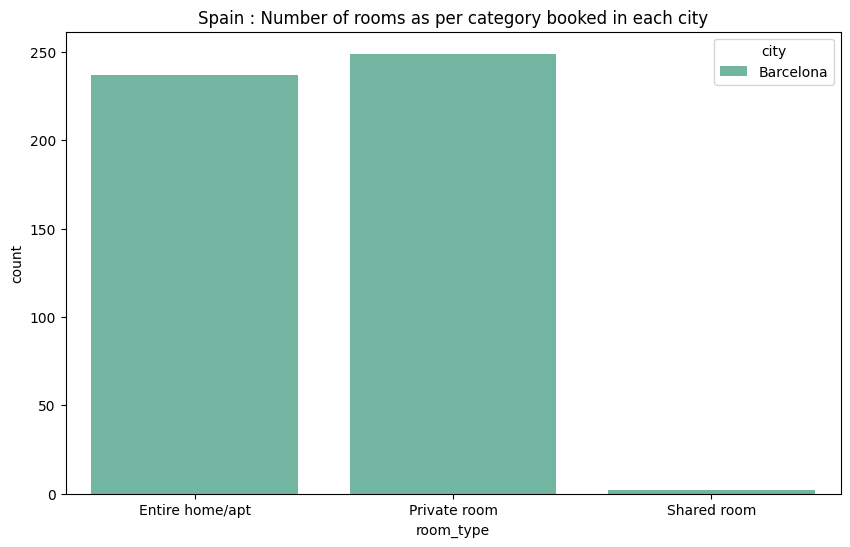

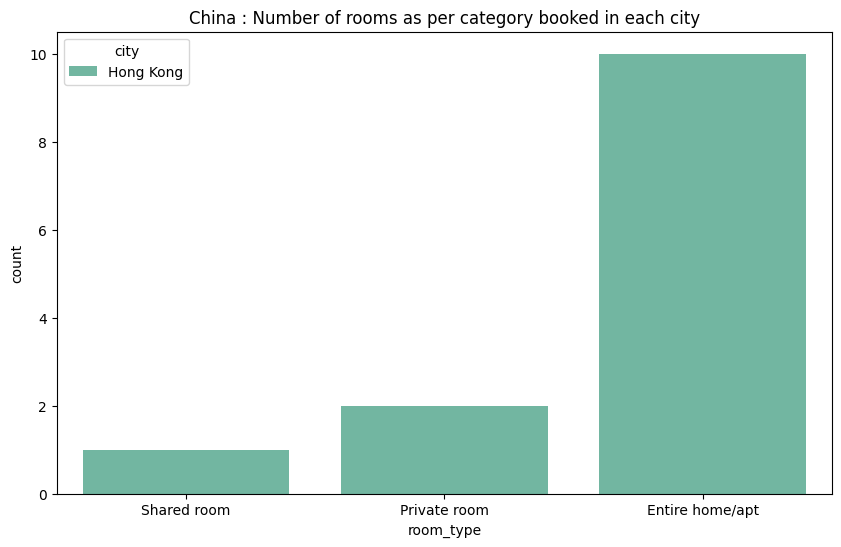

In [21]:
for country in countries:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data.query(f'country == "{country}"'), x="room_type", hue="city", palette="Set2")
    plt.title(f"{country} : Number of rooms as per category booked in each city")

Text(0.5, 1.0, 'Price range across countries')

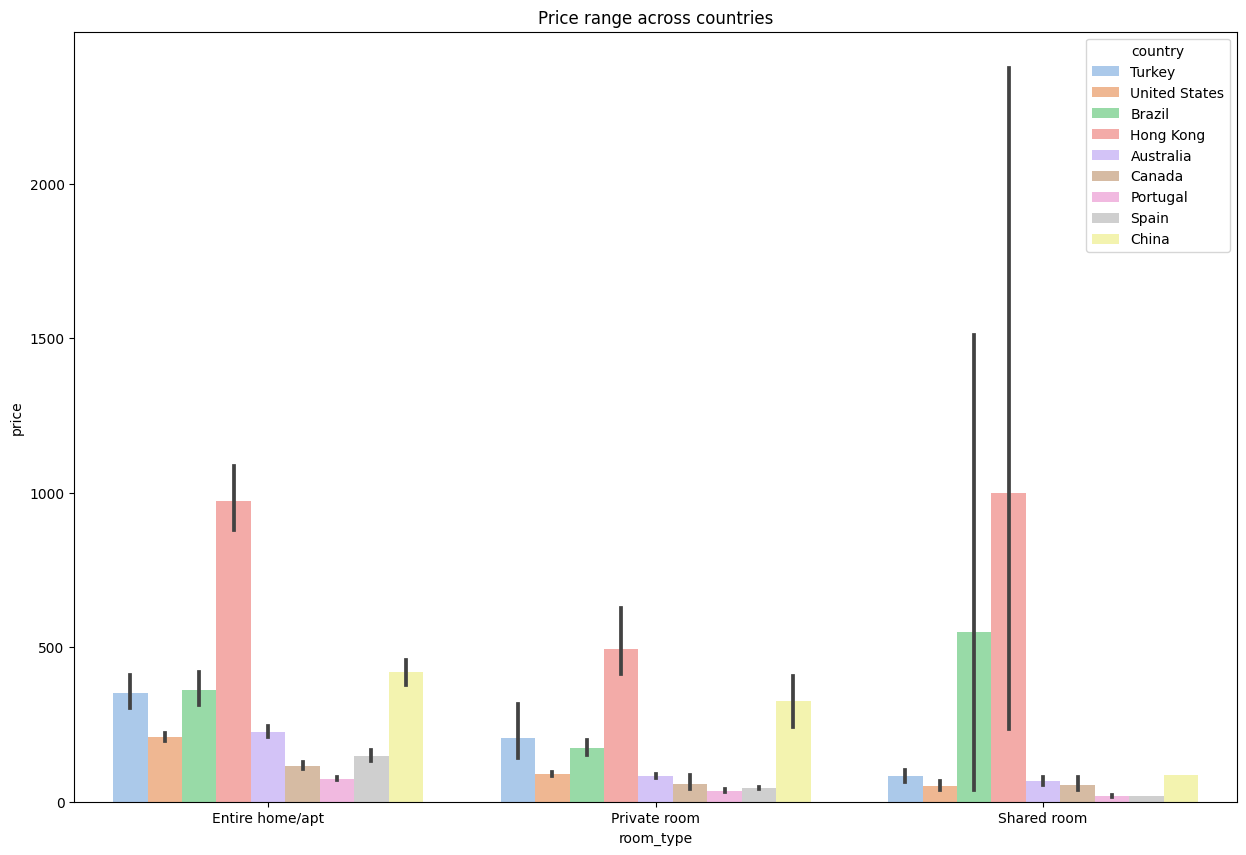

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x="room_type", y="price",hue="country", palette="pastel")
plt.title("Price range across countries")

In [23]:
countries = data['country'].unique()

Price range in each month across cities-country wise(Month is represented by 1,2,3..)


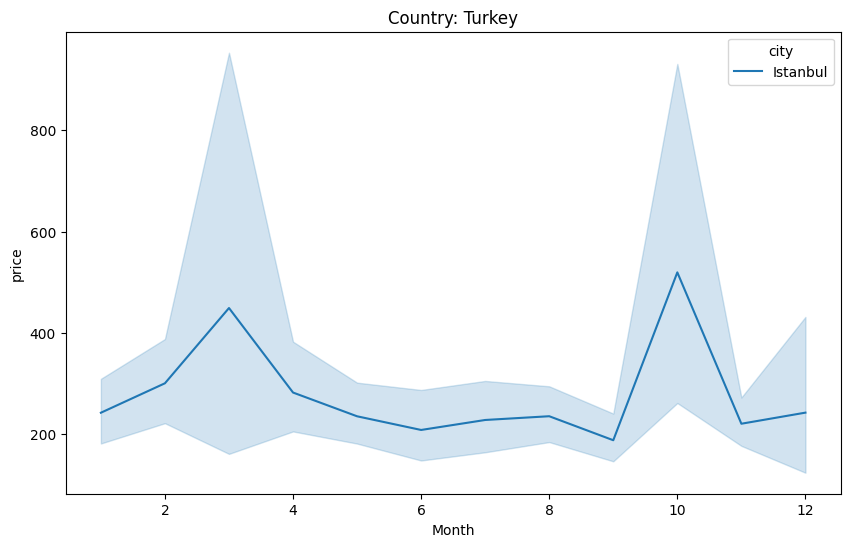

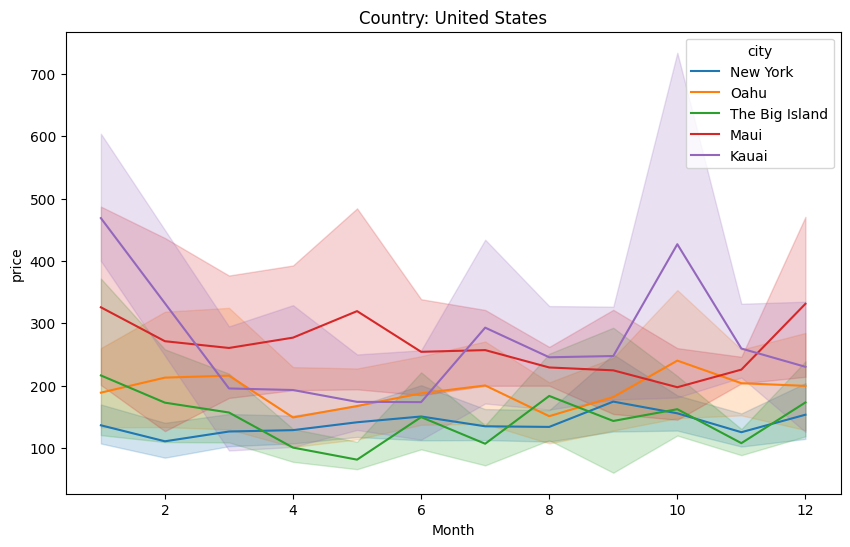

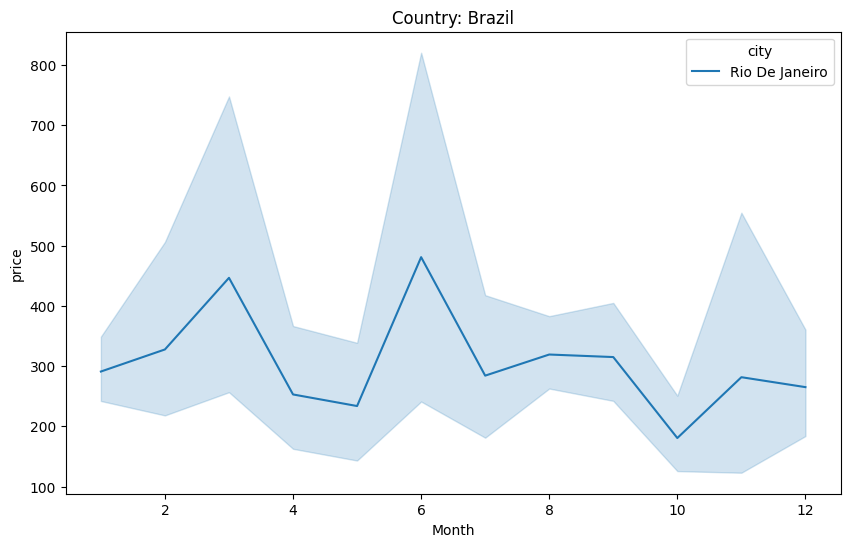

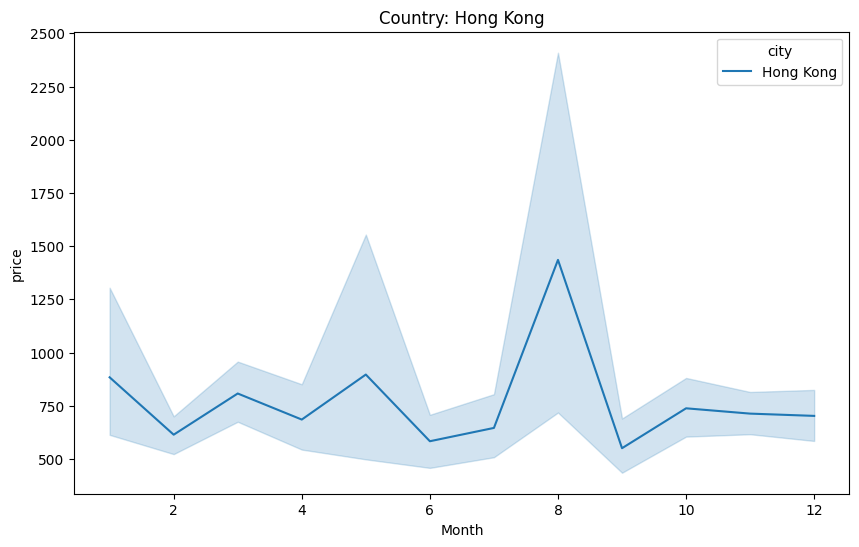

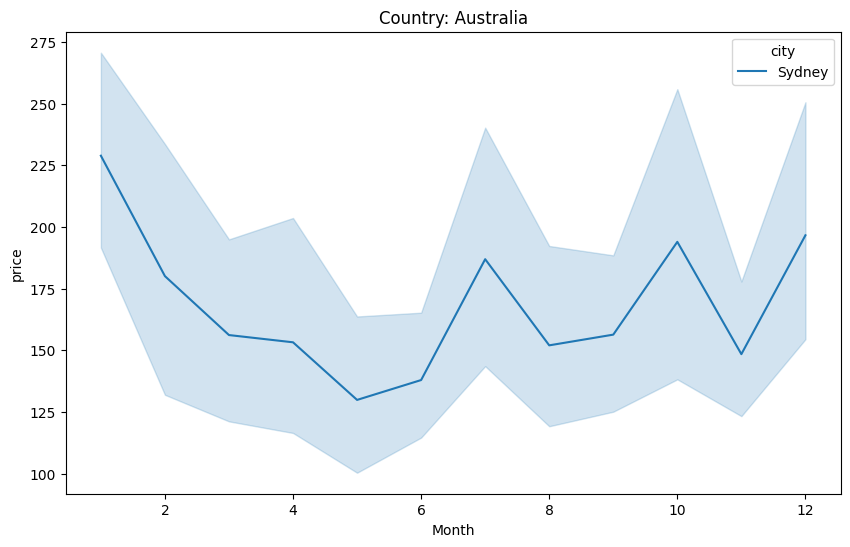

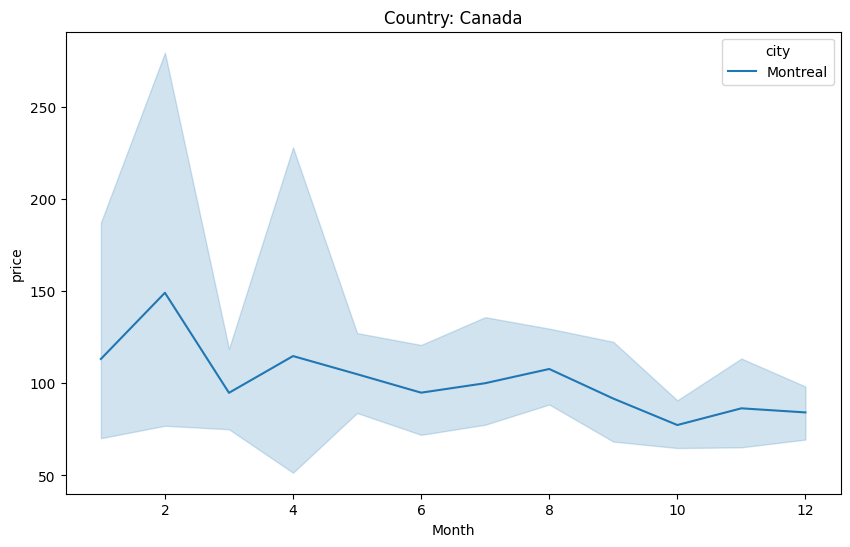

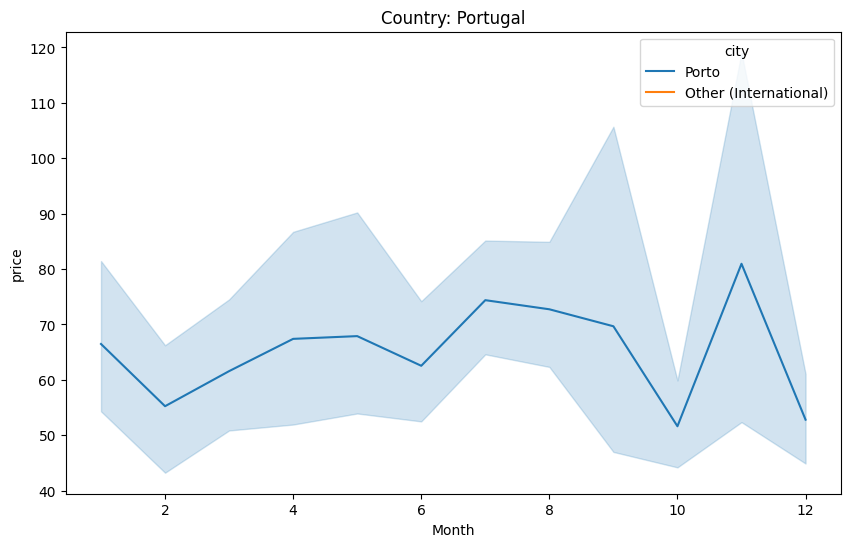

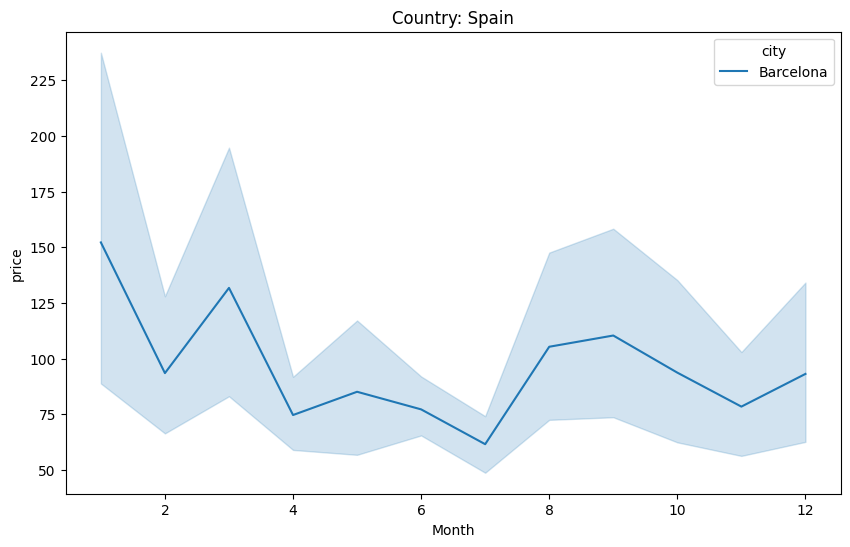

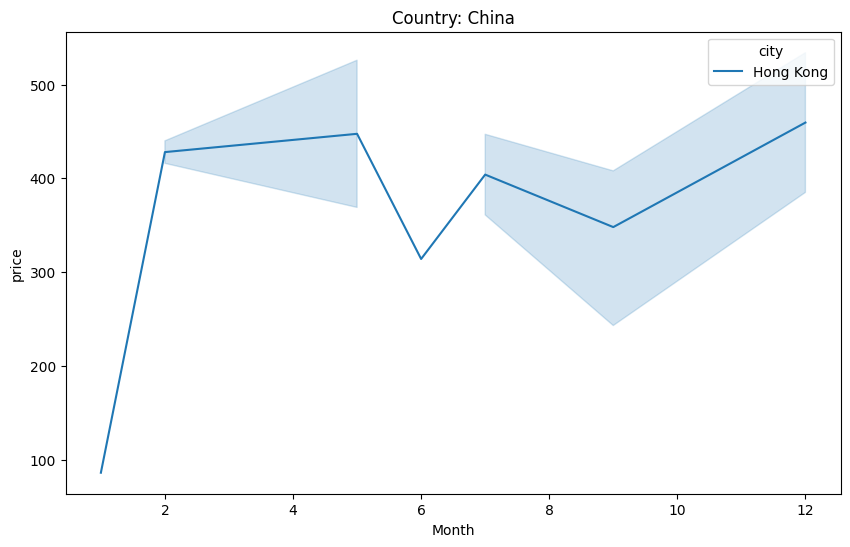

In [24]:
print("Price range in each month across cities-country wise(Month is represented by 1,2,3..)")
for country in countries:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=data.query(f'country == "{country}"'),x="review_date", y="price", hue="city")
    plt.title(f"Country: {country}")
    plt.xlabel("Month")
    plt.show()

Most reviewed and rated hosts in each city across countries


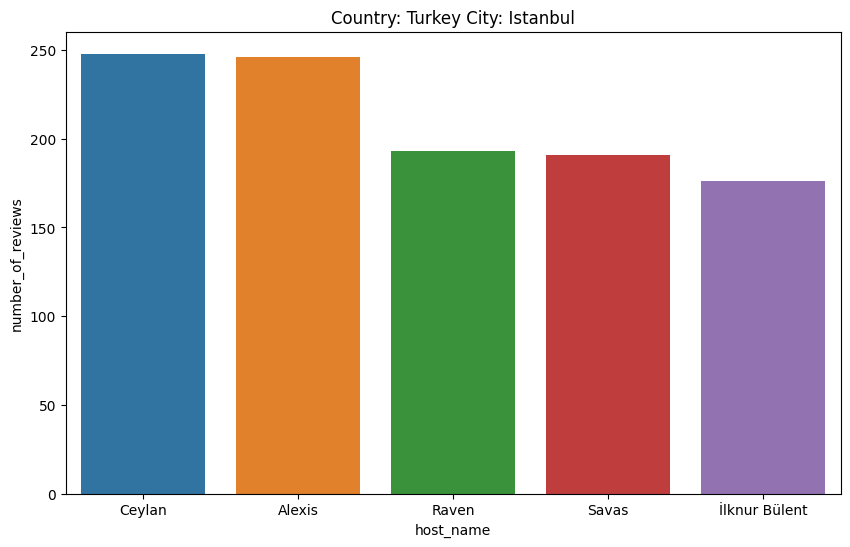

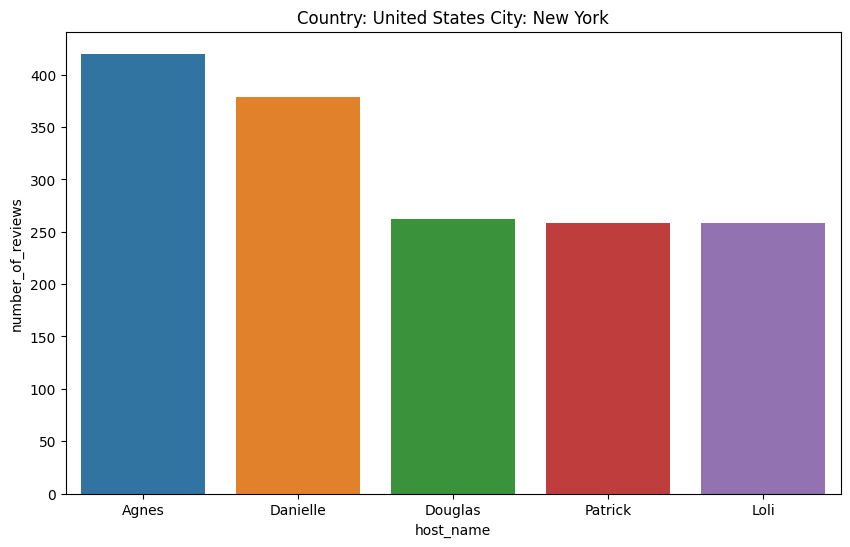

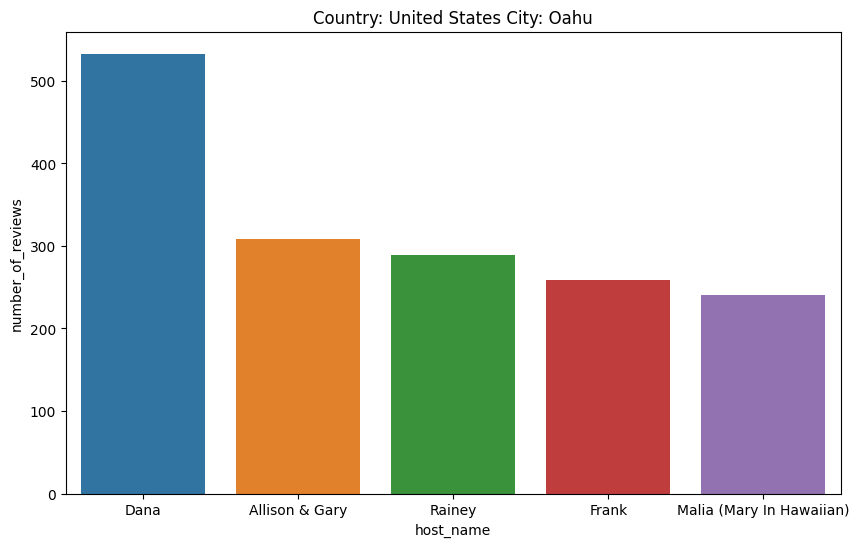

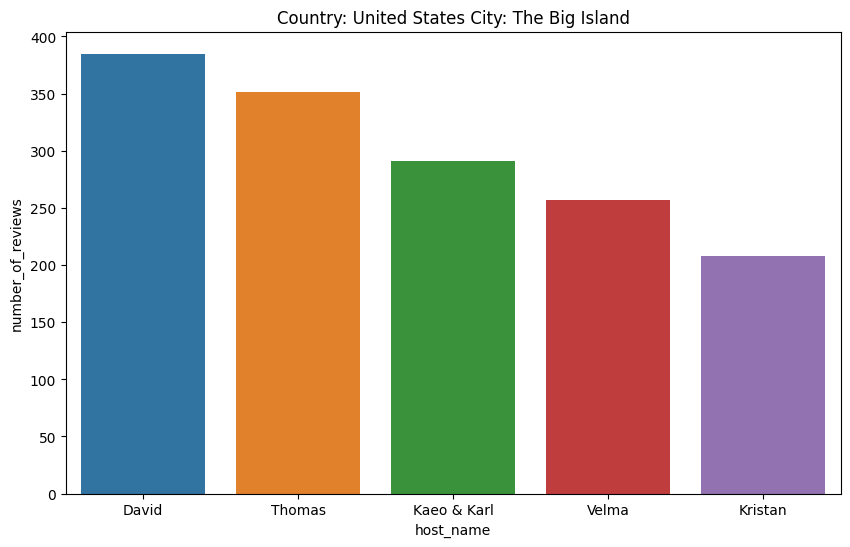

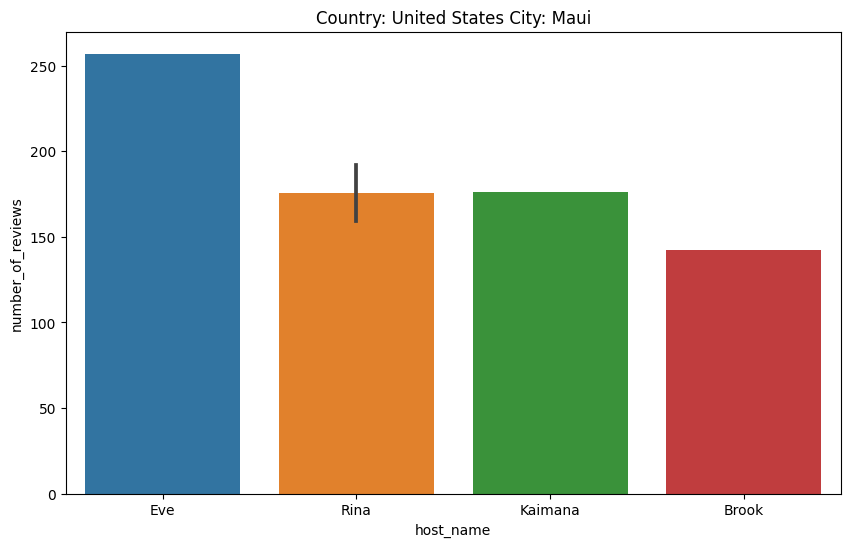

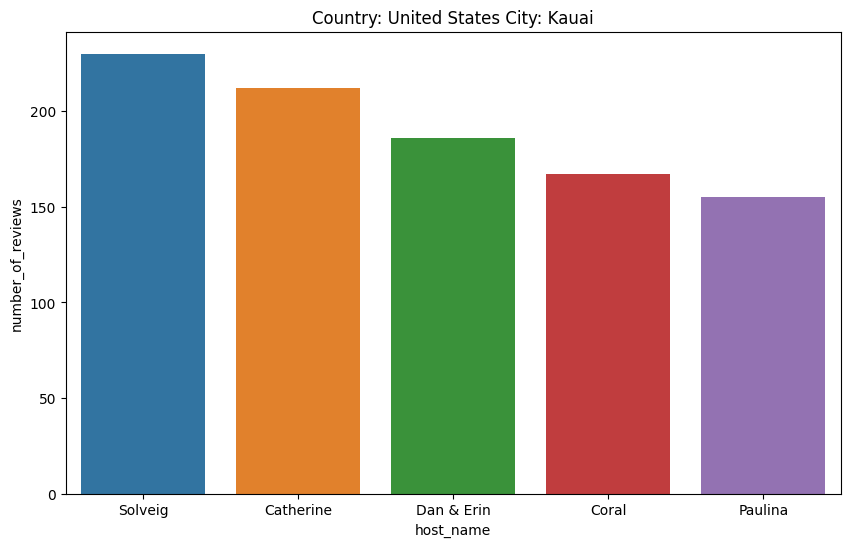

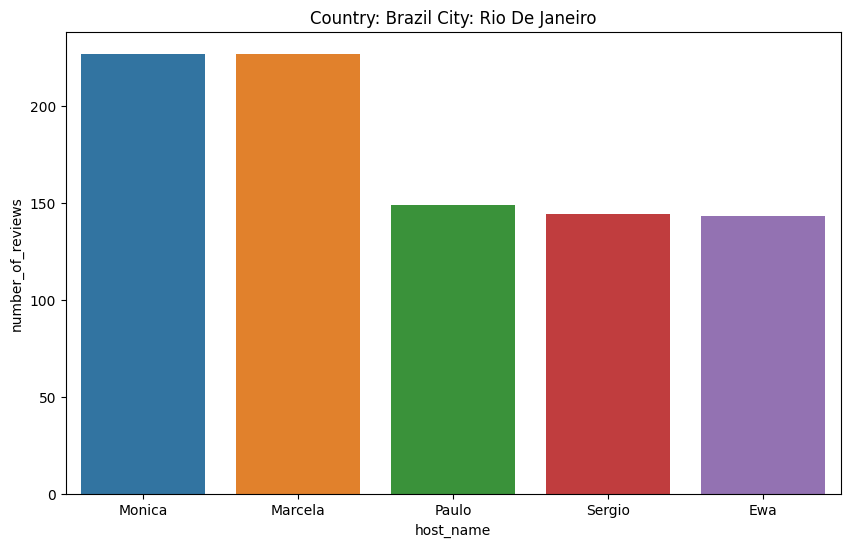

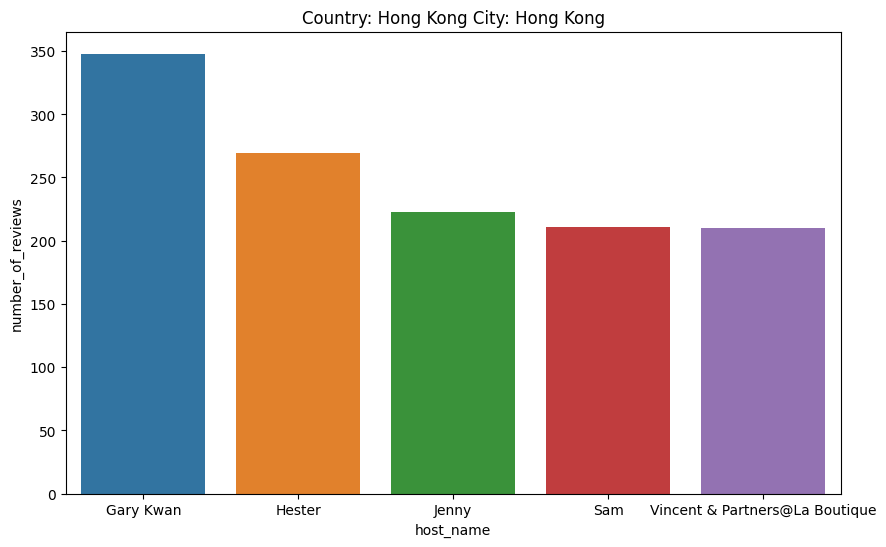

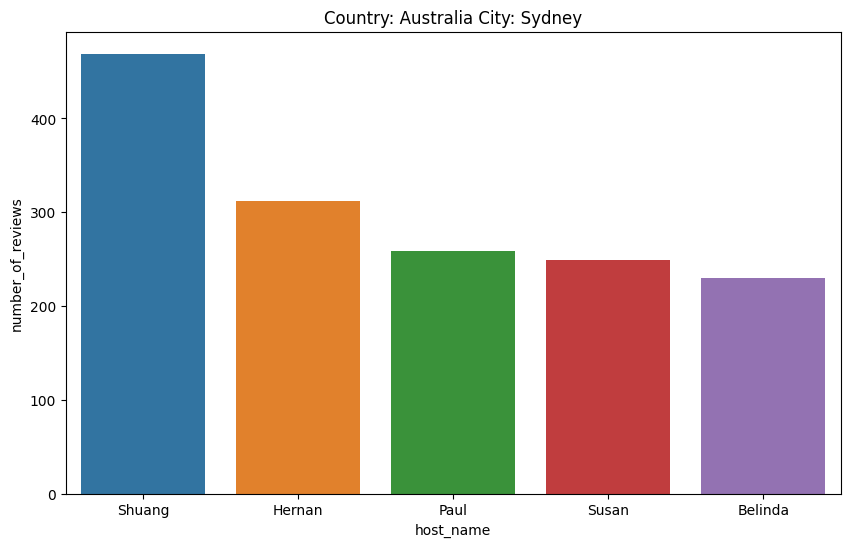

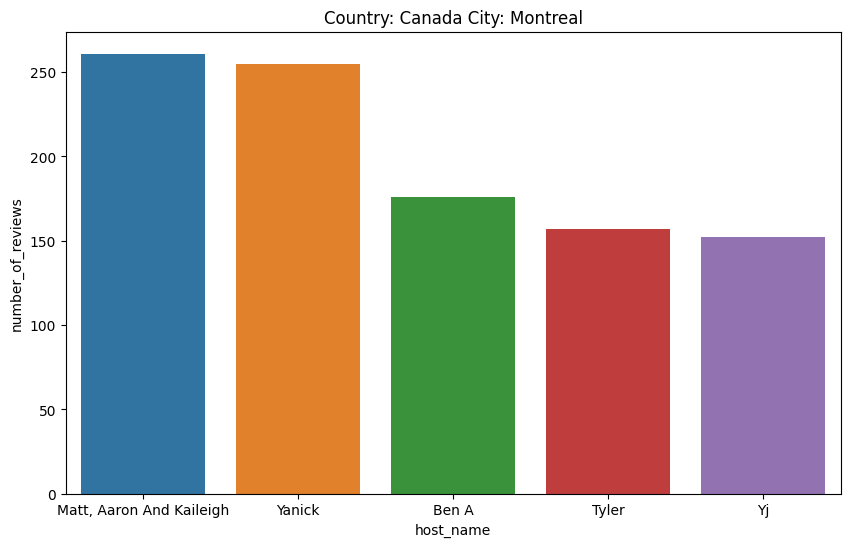

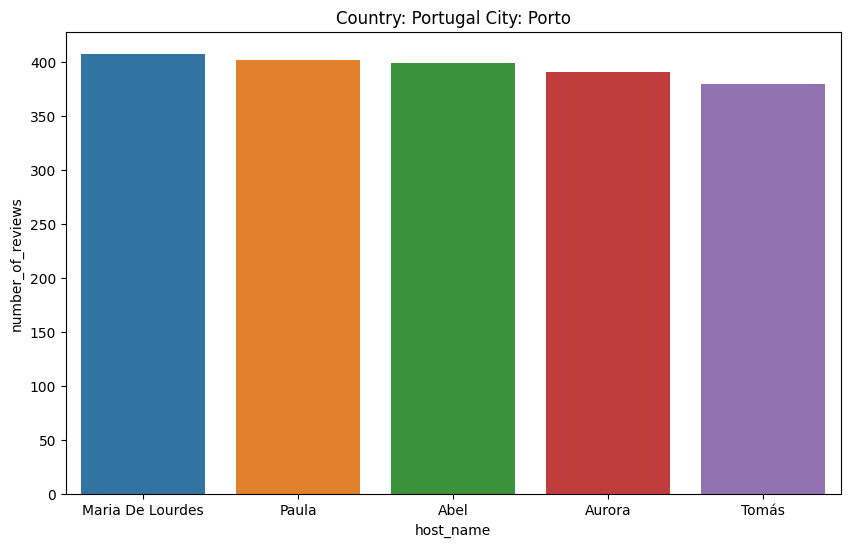

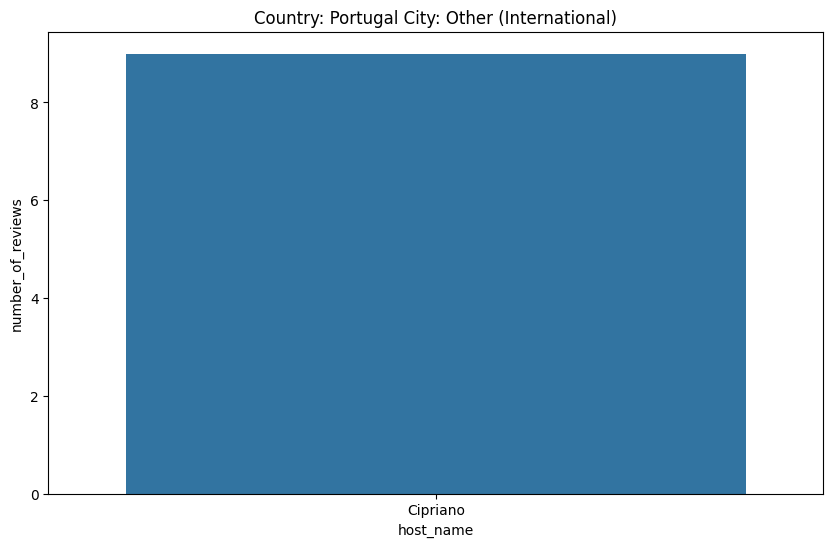

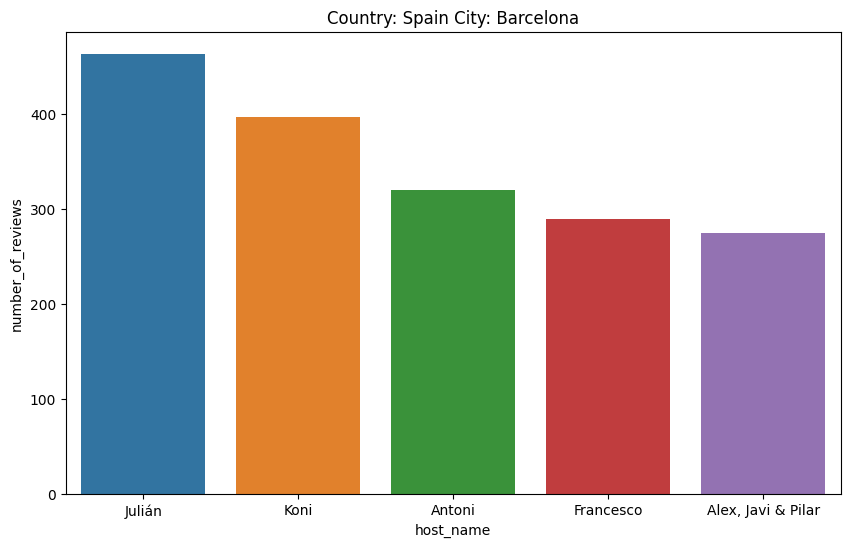

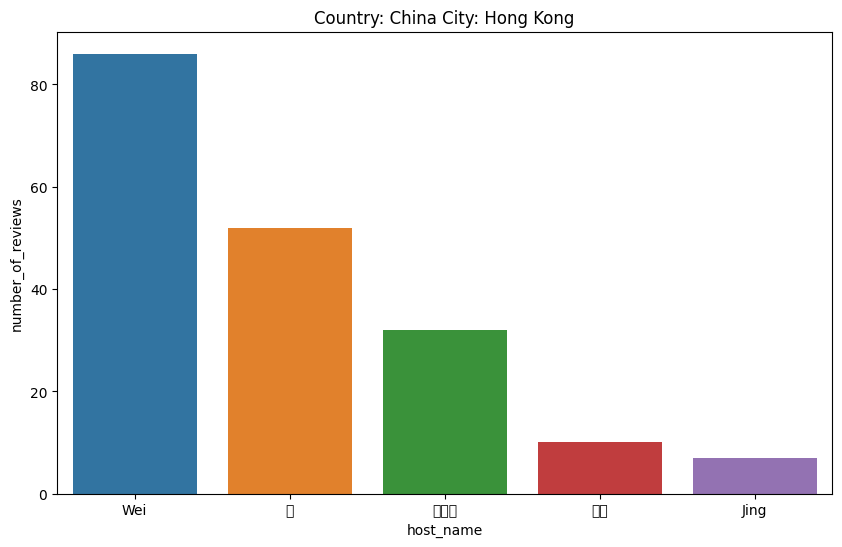

In [25]:
#most reviewed and rated hosts means that the place is good and people are visiting frequently
print("Most reviewed and rated hosts in each city across countries")
for country in countries:
    df = data.query(f'country == "{country}"')
    cities = df['city'].unique()
    for city in cities:
        df1 = df.query(f'city == "{city}" & rating >= 80.0').sort_values(by=['number_of_reviews'], ascending=False)        
        plt.figure(figsize=(10,6))
        sns.barplot(data=df1.head(),x="host_name", y="number_of_reviews")
        plt.title(f"Country: {country} City: {city}")
        plt.show()

Availability of each hosts in cities across countries-month wise
These hosts are most reviewed and rated as well


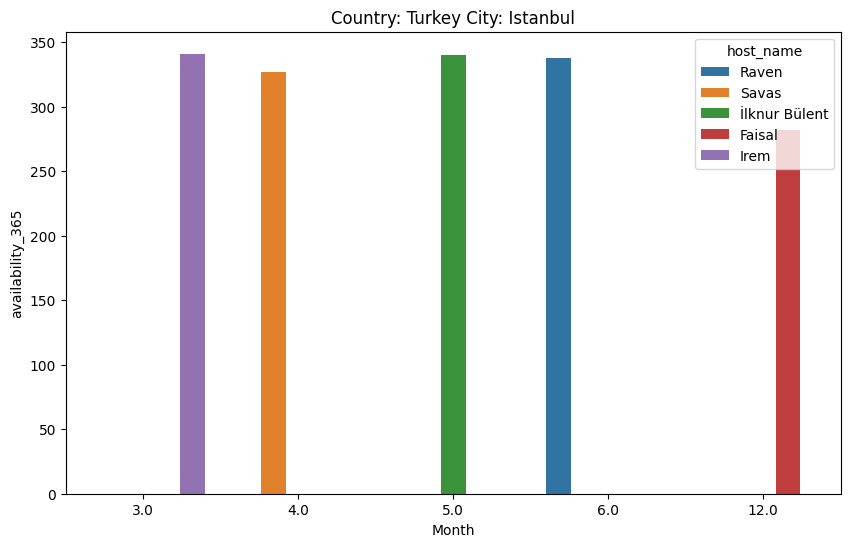

These hosts are most reviewed and rated as well


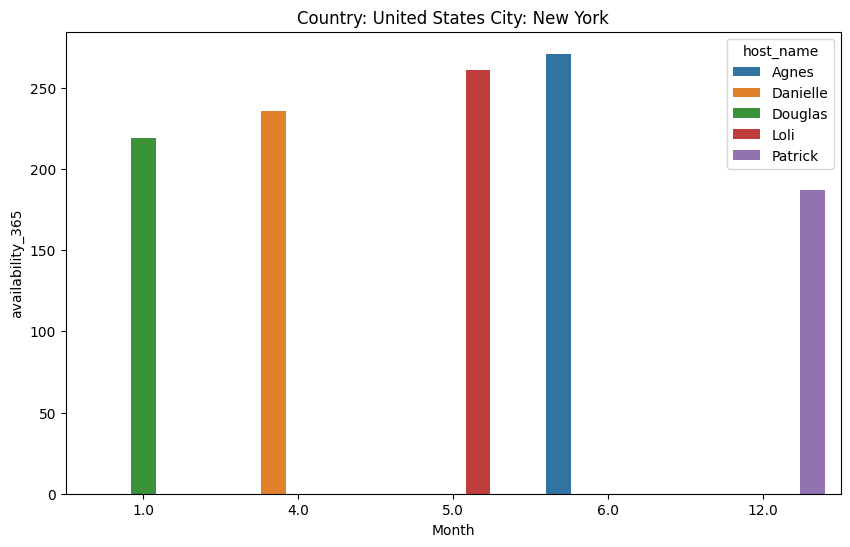

These hosts are most reviewed and rated as well


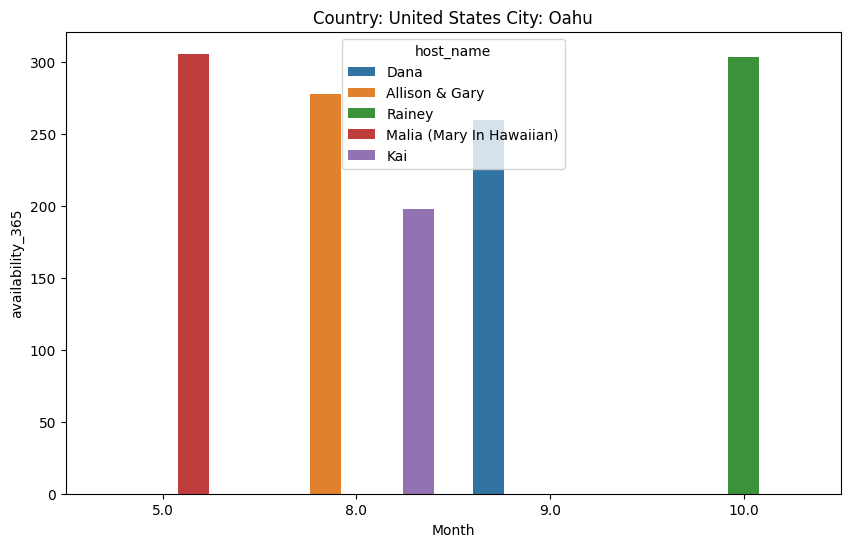

These hosts are most reviewed and rated as well


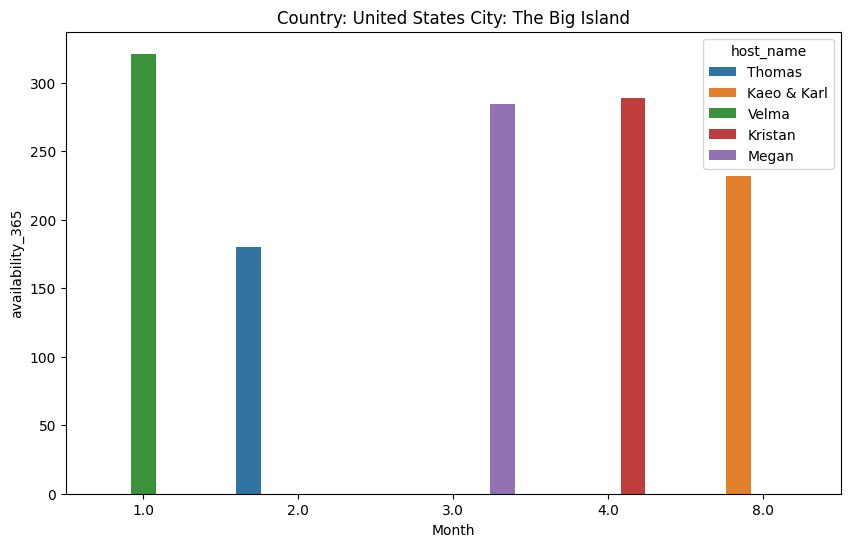

These hosts are most reviewed and rated as well


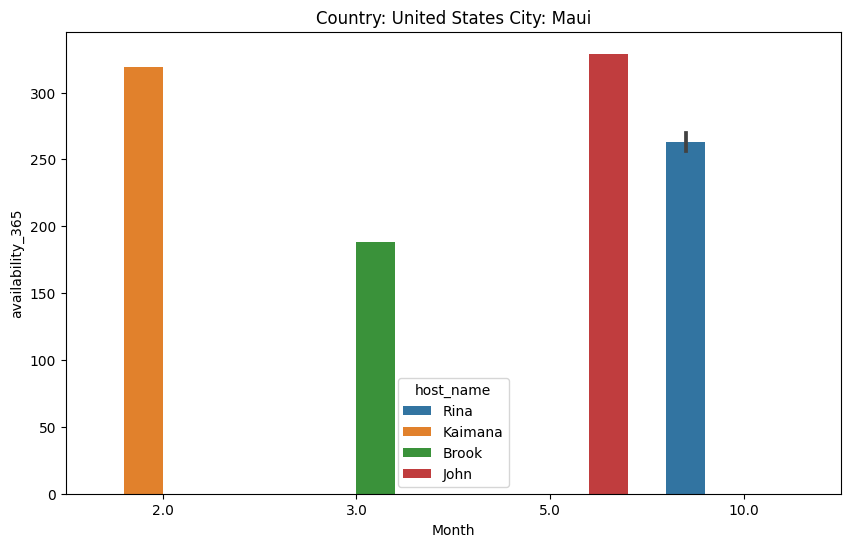

These hosts are most reviewed and rated as well


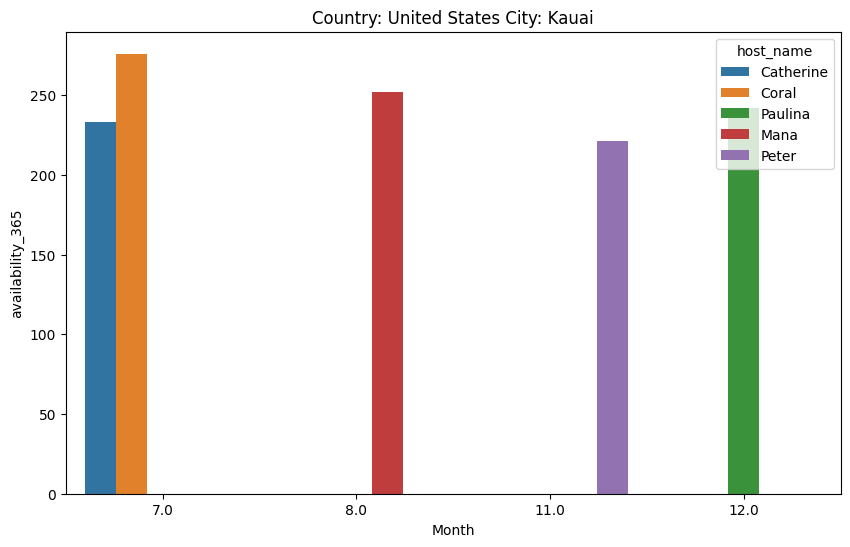

These hosts are most reviewed and rated as well


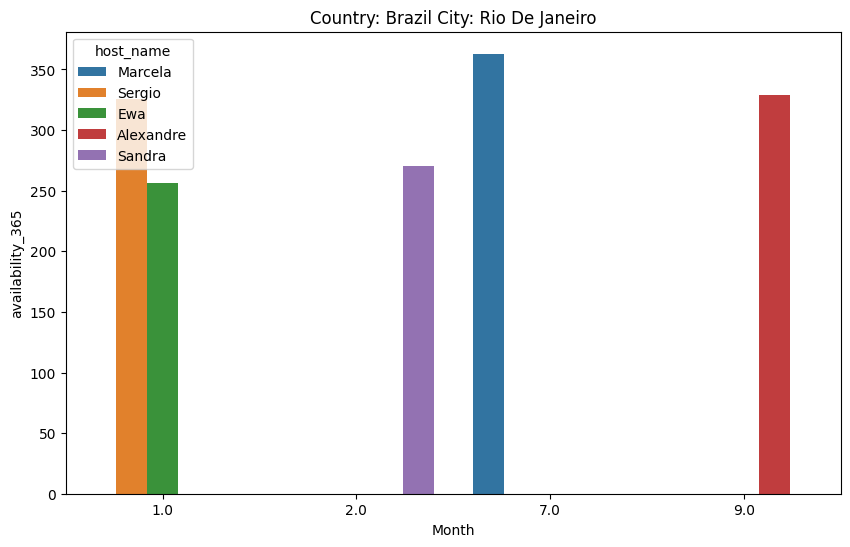

These hosts are most reviewed and rated as well


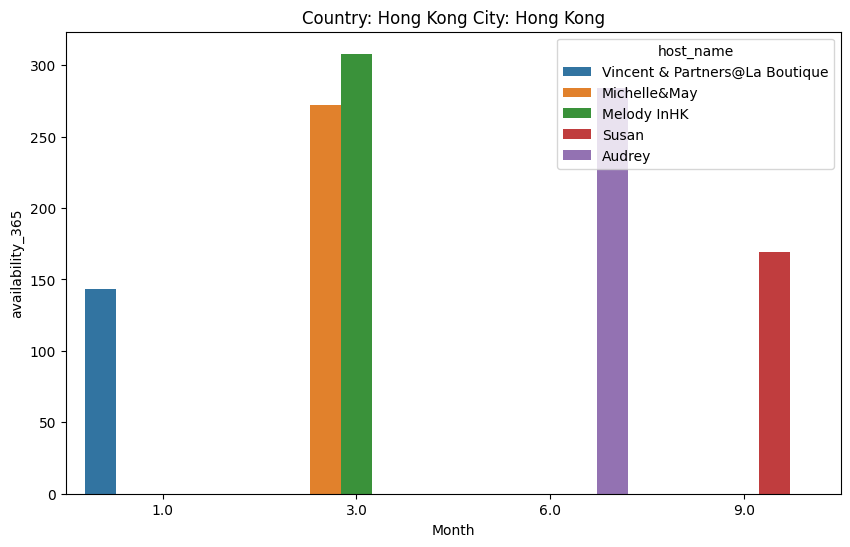

These hosts are most reviewed and rated as well


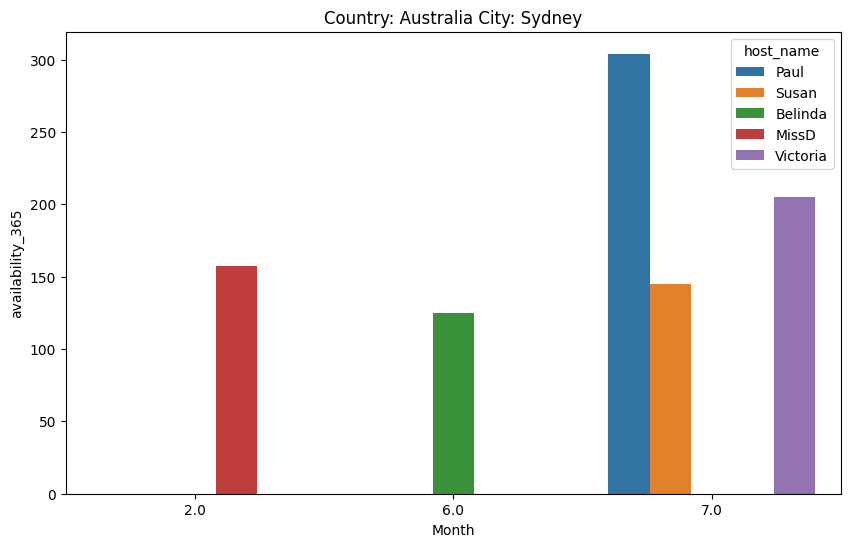

These hosts are most reviewed and rated as well


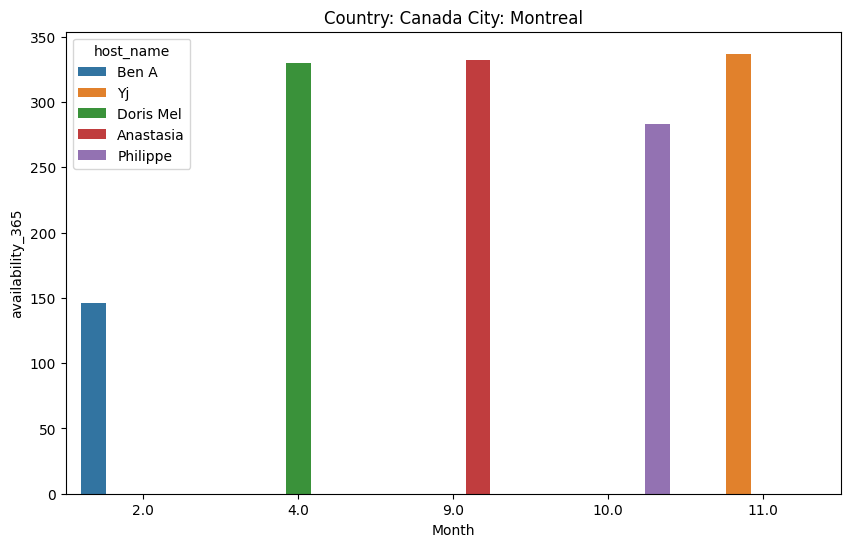

These hosts are most reviewed and rated as well


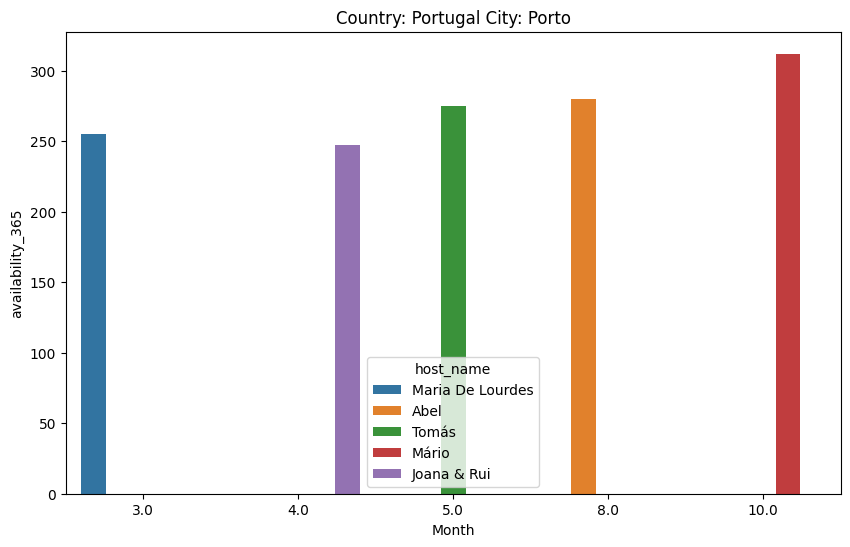

These hosts are most reviewed and rated as well


ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [26]:
print("Availability of each hosts in cities across countries-month wise")
for country in countries:
    df = data.query(f'country == "{country}"')
    cities = df['city'].unique()
    for city in cities:
        df1 = df.query(f'city == "{city}" & rating >= 80.0 & availability_365 >= availability_365.mean()').sort_values(by=['number_of_reviews'], ascending=False)        
        print("These hosts are most reviewed and rated as well")
        plt.figure(figsize=(10,6))
        sns.barplot(data=df1.head(),x="review_date", y="availability_365", hue="host_name")
        plt.title(f"Country: {country} City: {city}")
        plt.xlabel("Month")
        plt.show()

Hosts which are in demand in cities across countries-month wise
These hosts are most reviewed and rated as well


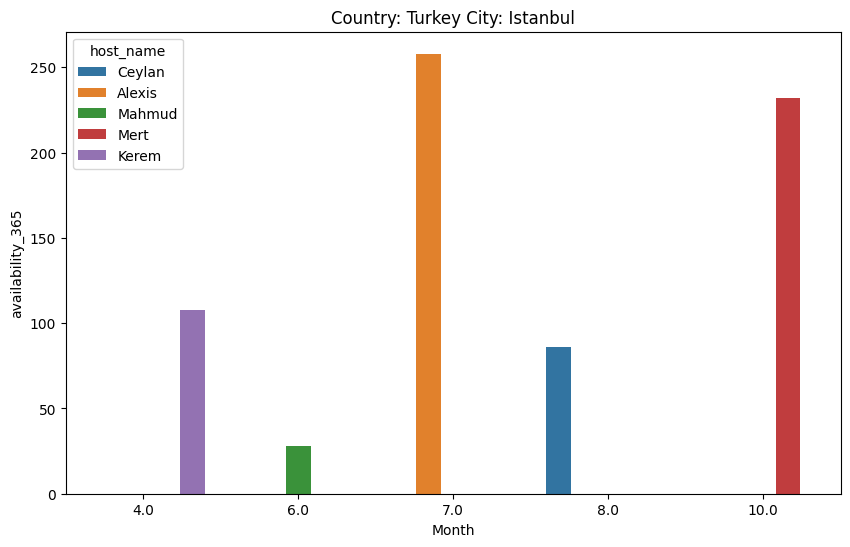

These hosts are most reviewed and rated as well


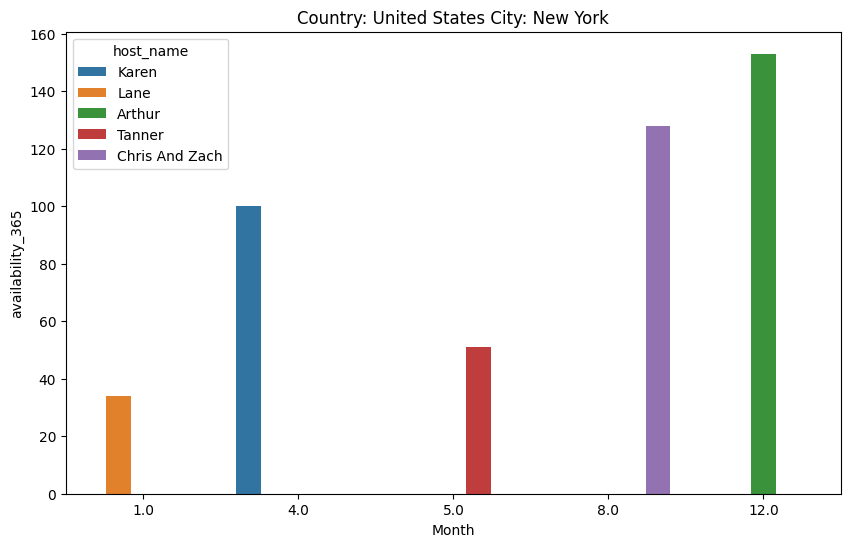

These hosts are most reviewed and rated as well


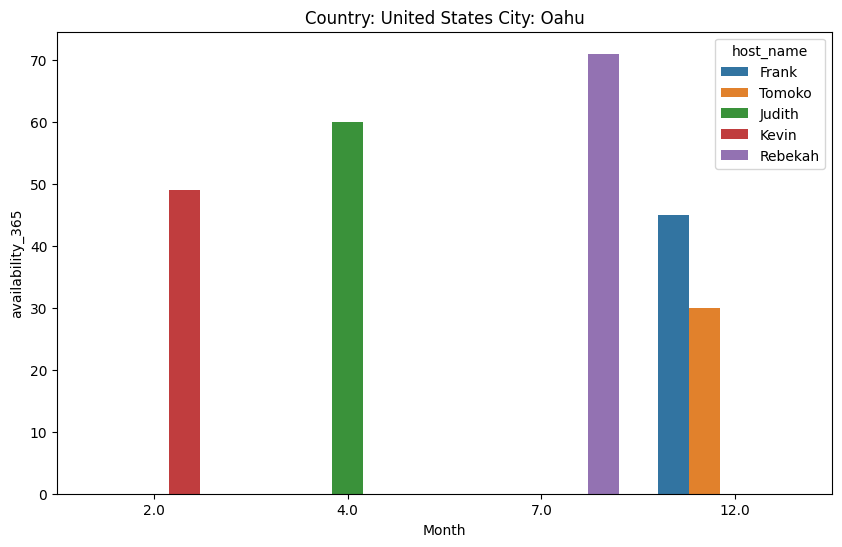

These hosts are most reviewed and rated as well


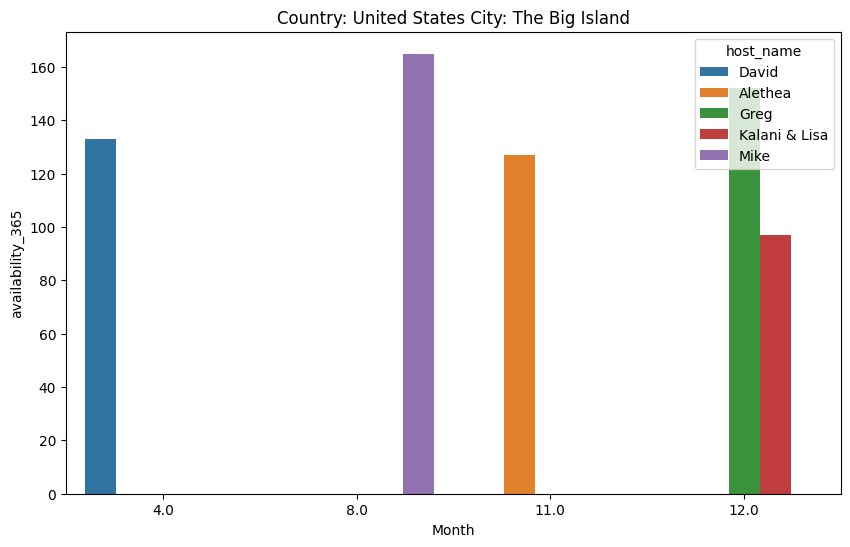

These hosts are most reviewed and rated as well


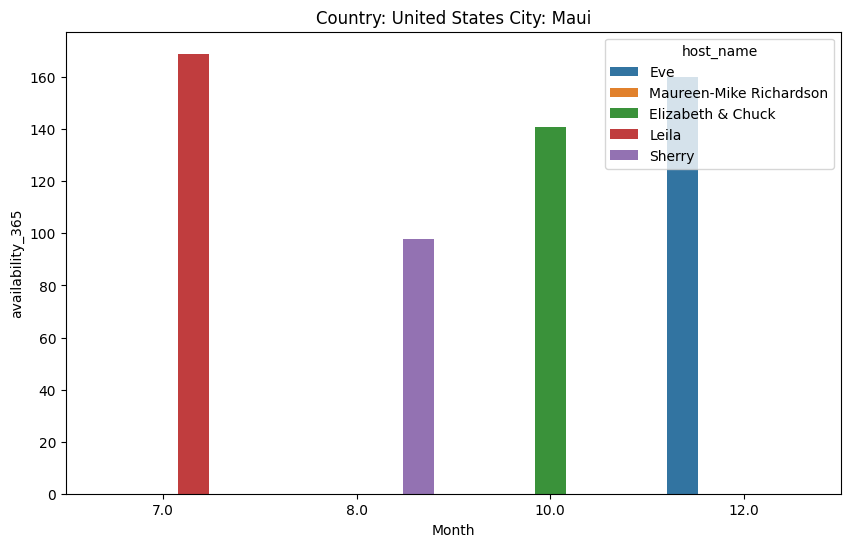

These hosts are most reviewed and rated as well


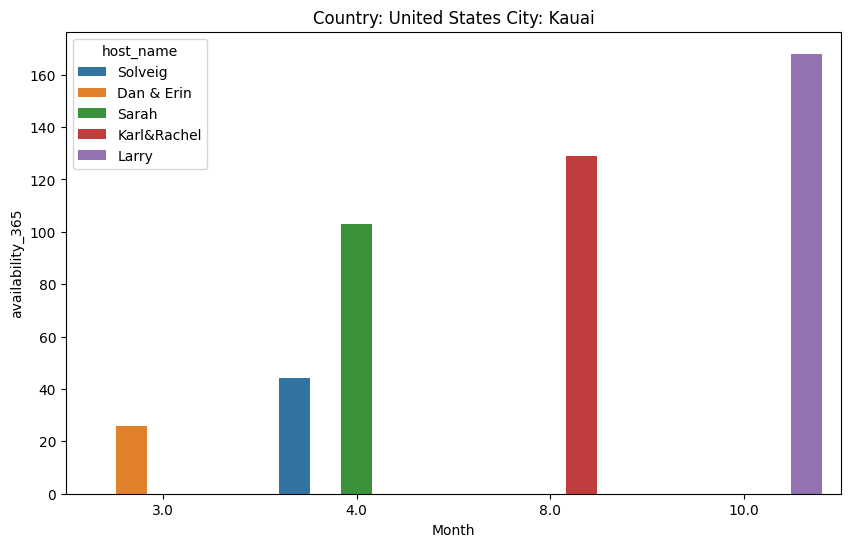

These hosts are most reviewed and rated as well


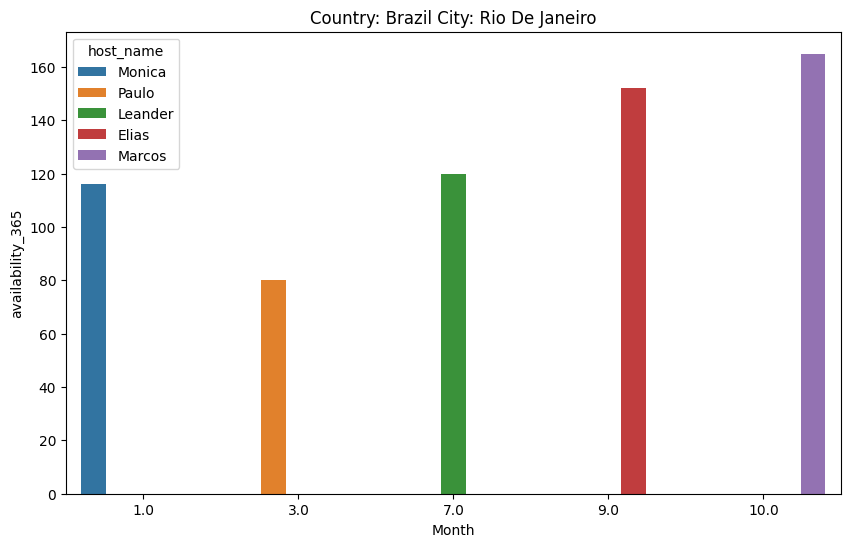

These hosts are most reviewed and rated as well


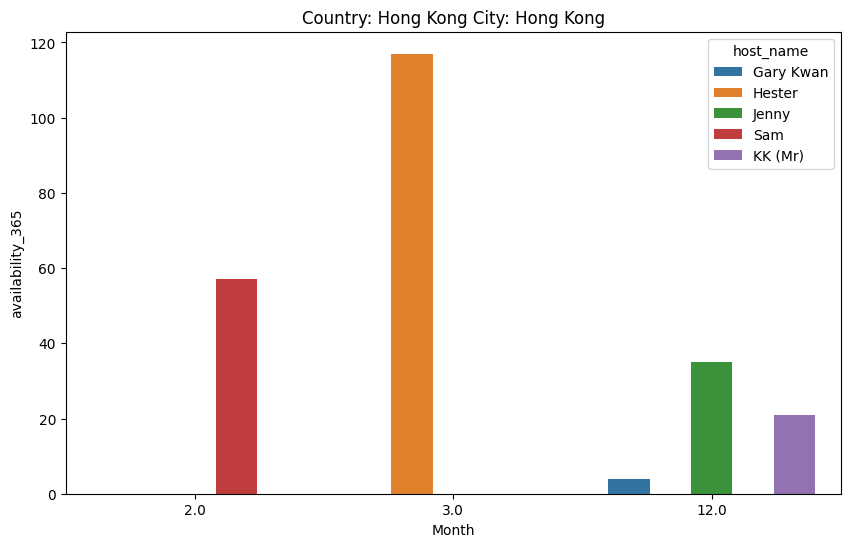

These hosts are most reviewed and rated as well


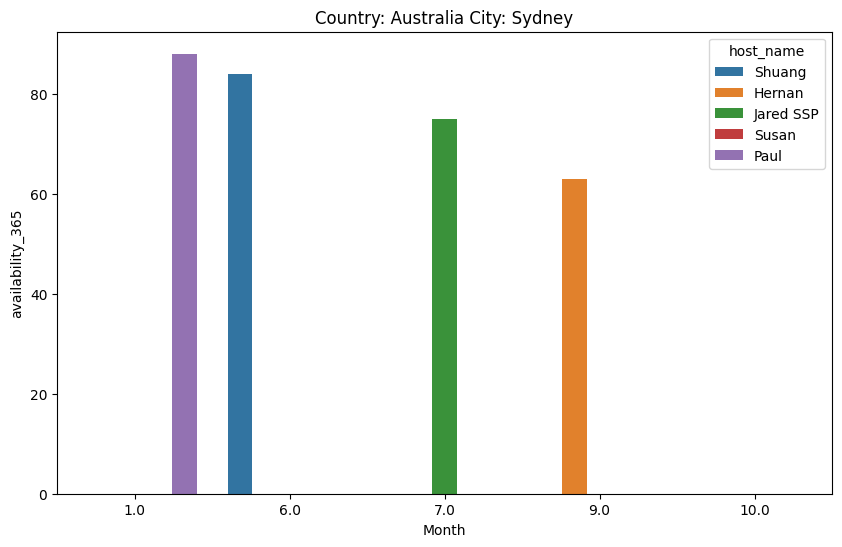

These hosts are most reviewed and rated as well


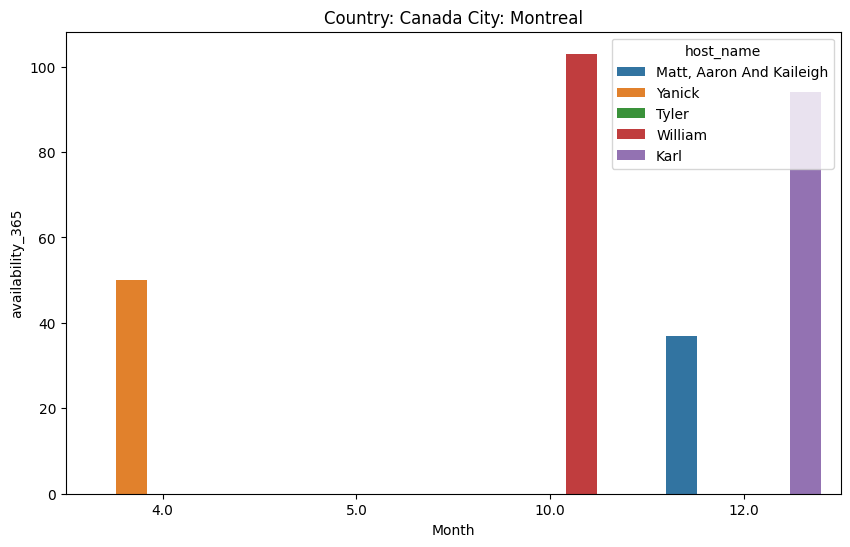

These hosts are most reviewed and rated as well


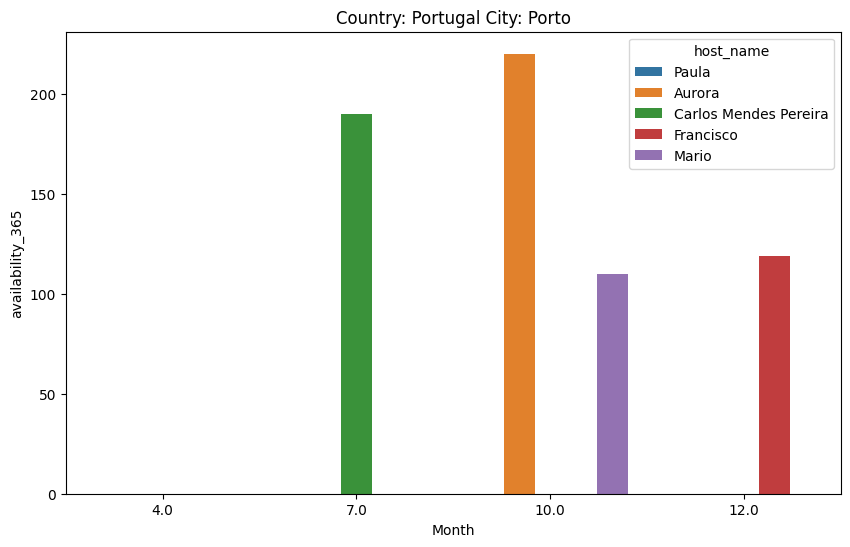

These hosts are most reviewed and rated as well


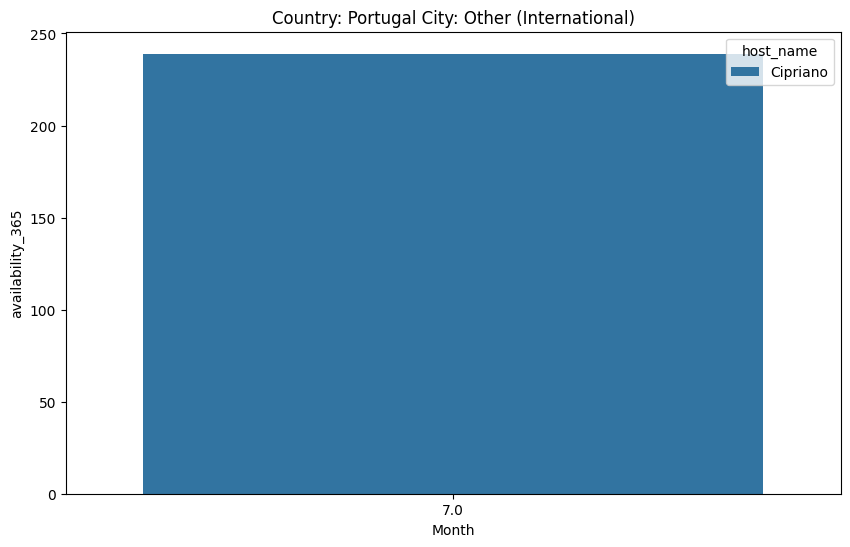

These hosts are most reviewed and rated as well


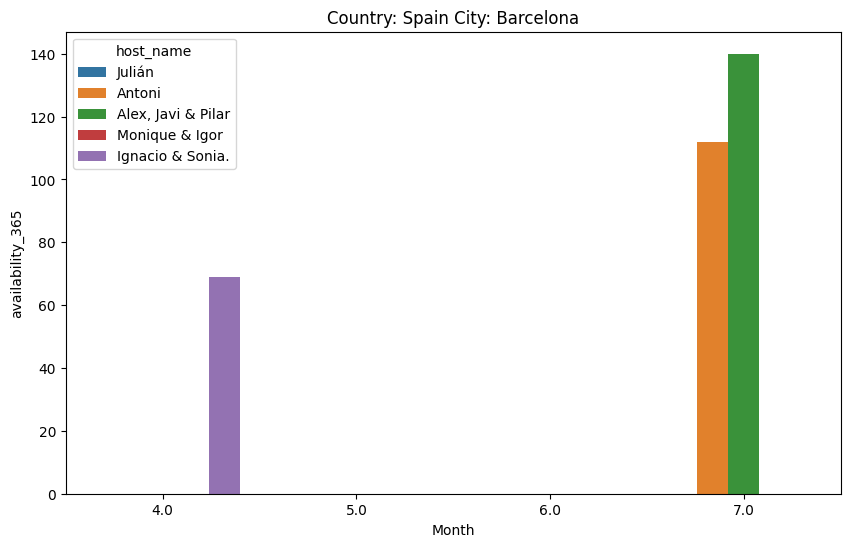

These hosts are most reviewed and rated as well


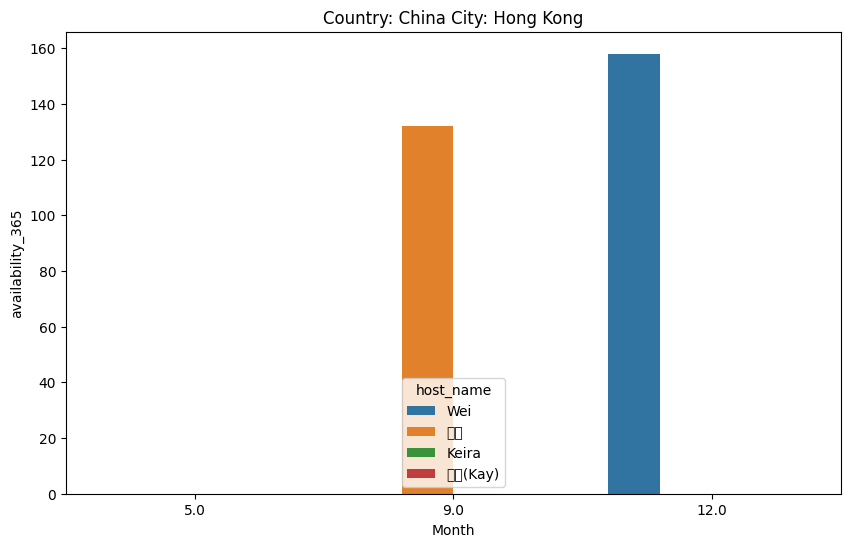

In [27]:
print("Hosts which are in demand in cities across countries-month wise")
for country in countries:
    df = data.query(f'country == "{country}"')
    cities = df['city'].unique()
    for city in cities:
        df1 = df.query(f'city == "{city}" & rating >= 80.0 & availability_365 < availability_365.mean()').sort_values(by=['number_of_reviews'], ascending=False)        
        print("These hosts are most reviewed and rated as well")
        plt.figure(figsize=(10,6))
        sns.barplot(data=df1.head(),x="review_date", y="availability_365", hue="host_name")
        plt.title(f"Country: {country} City: {city}")
        plt.xlabel("Month")
        plt.show()

In [ ]:
#import folium

In [ ]:
#data.head(10)

In [ ]:
#data.insert(0,'lat'," ")

In [ ]:
#data.insert(1,'lon'," ")

In [ ]:
#data.reset_index(drop=True, inplace=True)

In [ ]:
#for i in range(len(data)):
   # data['lat'][i], data['lon'][i] = data['coordinates'][i].strip('[]').split(',')

In [ ]:
# data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
# data['lon'] = pd.to_numeric(data['lon'], errors='coerce')

In [ ]:
# data.to_csv("airbnb.csv")

In [ ]:
#df2 = data.query('country == "China"')

In [ ]:
# map = folium.Map(df2[['lat','lon']].mean().values.tolist(), zoom_start=15, tiles="cartodb positron")
# for lat, lon, host in zip(df2['lat'], df2['lon'], df2['host_name']):
#     folium.Marker([lat, lon], popup=host).add_to(map)

# sw = df2[['lat', 'lon']].min().values.tolist()
# ne = df2[['lat', 'lon']].max().values.tolist()

# map.fit_bounds([sw, ne]) 
# map